In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from category_encoders import OrdinalEncoder, OneHotEncoder
from sklearn.linear_model import Ridge, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score, f1_score, mean_squared_error, mean_absolute_error

In [2]:
data = pd.read_csv('gorimost.csv')
data

,Год,Территория,Поголовье скота,Т. год,Осадки. год,Горимость
0,2001,Актюбинская область,3183.3,5.700000,402.00,0.09
1,2002,Актюбинская область,3284.7,5.700000,308.00,0.17
2,2003,Актюбинская область,3468.8,5.000000,381.00,0.06
3,2004,Актюбинская область,3657.4,6.500000,406.00,0.19
4,2005,Актюбинская область,3878.1,5.700000,220.00,0.07
...,...,...,...,...,...,...
115,2016,Калмыкия,5306.1,11.617099,285.75,0.00
116,2017,Калмыкия,5691.1,11.898593,191.90,0.02
117,2018,Калмыкия,5090.6,11.781667,186.20,0.01
118,2019,Калмыкия,NaN,12.235244,208.20,0.01


In [3]:
data = data.drop(['Год'], axis=1)
data['Поголовье скота'] = data.groupby(['Территория'])['Поголовье скота'].transform(lambda x: x.fillna(x.mean())).round(0)
data['Т. год'] = data.groupby(['Территория'])['Т. год'].transform(lambda x: x.fillna(x.mean())).round(0)
data['Осадки. год'] = data.groupby(['Территория'])['Осадки. год'].transform(lambda x: x.fillna(x.mean())).round(0)

In [4]:
enc = OneHotEncoder()
data = data.drop(['Территория'], axis = 1).join(enc.fit_transform(data[['Территория']], axis = 0))

<AxesSubplot:>

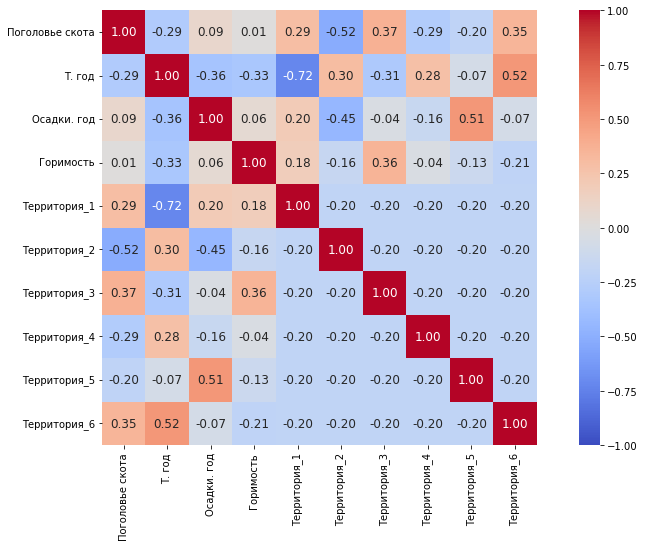

In [5]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(), cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 12}, vmin=-1, center=0,\
                        cmap=sns.color_palette('coolwarm',1000))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(['Горимость'], axis=1), 
                                                    data['Горимость'], test_size=0.15, 
                                                    random_state=1231)

In [7]:
cv = 10
scalers = (RobustScaler(), StandardScaler(), MinMaxScaler())

regressors = (
    RidgeCV(cv=cv, alphas=[0.001,0.01, 0.1, 1, 10]), 
    LassoCV(cv=cv, alphas=[0.001,0.01, 0.1, 1, 10], n_alphas=[100, 200, 300, 400]), 
    ElasticNetCV(cv=cv, alphas=[0.001,0.01, 0.1, 1, 10], n_alphas=[100, 200, 300, 400])
)

for scaler in scalers:
    for regressor in regressors:
        
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        
        regressor.fit(X_train, y_train)
        y_pred = regressor.predict(X_test)
        print('R2: ' + str(regressor.score(X_test, y_test)))
        print('RMSE: ' + str(mean_squared_error(y_test, y_pred, squared=False)))
        print('MAE: ' + str(mean_absolute_error(y_test, y_pred)))
        print('Scaler: ' + scaler.__class__.__name__)
        print('Regressor\'s type:' + regressor.__class__.__name__)
        print('==' * 20)

R2: 0.20219469125955603
RMSE: 0.035868986303590554
MAE: 0.0260354215346333
Scaler: RobustScaler
Regressor's type:RidgeCV
R2: 0.177034671089232
RMSE: 0.03643018794476603
MAE: 0.02550083686037457
Scaler: RobustScaler
Regressor's type:LassoCV
R2: 0.1586649717960461
RMSE: 0.036834529569839444
MAE: 0.02668829886940705
Scaler: RobustScaler
Regressor's type:ElasticNetCV
R2: 0.18264230240497192
RMSE: 0.03630585934555389
MAE: 0.026209261038467418
Scaler: StandardScaler
Regressor's type:RidgeCV
R2: 0.16175210651191974
RMSE: 0.03676688846628651
MAE: 0.027015052972378516
Scaler: StandardScaler
Regressor's type:LassoCV
R2: 0.14866834040518873
RMSE: 0.03705271487272105
MAE: 0.027436181850070056
Scaler: StandardScaler
Regressor's type:ElasticNetCV
R2: 0.19365492921549943
RMSE: 0.03606044734342214
MAE: 0.028231342021188766
Scaler: MinMaxScaler
Regressor's type:RidgeCV
R2: 0.21896160913650053
RMSE: 0.03549006813015815
MAE: 0.026426989059261885
Scaler: MinMaxScaler
Regressor's type:LassoCV
R2: 0.1952084

In [8]:
df = pd.read_csv('Statistika_gorimost_po_rayonam - Динамика горимости.csv')

list_of_df = []
for i in range(len(df)):
    new_df = df.iloc[i,:].to_frame(name="flammability").reset_index()
    new_df['region'] = new_df.iloc[1,1]
    new_df['OSM_ID'] = new_df.iloc[0,1]
    new_df = new_df.iloc[3:,:]
    list_of_df.append(new_df)
    
output1 = pd.concat(list_of_df).reset_index()
output1 = output1.rename(columns={"index": "year"})
output1 = output1.drop(['level_0'], axis=1)

In [9]:
df = pd.read_csv('Statistika_gorimost_po_rayonam - Динамика NDVI.csv')

list_of_df = []
for i in range(len(df)):
    new_df = df.iloc[i,:].to_frame(name="NDVI").reset_index()
    new_df['OSM_ID'] = new_df.iloc[0,1]
    new_df = new_df.iloc[1:,:]
    list_of_df.append(new_df)
    
output2 = pd.concat(list_of_df).reset_index()
output2 = output2.rename(columns={"index": "year"})
output2 = output2.drop(['level_0'], axis=1)

In [10]:
df = pd.read_csv('Statistika_gorimost_po_rayonam - Динамика Осадки.csv')

list_of_df = []
for i in range(len(df)):
    new_df = df.iloc[i,:].to_frame(name="precipitation").reset_index()
    new_df['OSM_ID'] = new_df.iloc[0,1]
    new_df = new_df.iloc[1:,:]
    list_of_df.append(new_df)
    
output3 = pd.concat(list_of_df).reset_index()
output3 = output3.rename(columns={"index": "year"})
output3 = output3.drop(['level_0'], axis=1)

In [11]:
df = pd.read_csv('Statistika_gorimost_po_rayonam - Динамика Скот.csv')

list_of_df = []
for i in range(len(df)):
    new_df = df.iloc[i,:].to_frame(name="stock").reset_index()
    new_df['OSM_ID'] = new_df.iloc[0,1]
    new_df = new_df.iloc[1:,:]
    list_of_df.append(new_df)
    
output4 = pd.concat(list_of_df).reset_index()
output4 = output4.rename(columns={"index": "year"})
output4 = output4.drop(['level_0'], axis=1)

In [12]:
df = pd.read_csv('Statistika_gorimost_po_rayonam - Динамика Т макс.csv')

list_of_df = []
for i in range(len(df)):
    new_df = df.iloc[i,:].to_frame(name="t").reset_index()
    new_df['OSM_ID'] = new_df.iloc[0,1]
    new_df = new_df.iloc[1:,:]
    list_of_df.append(new_df)
    
output5 = pd.concat(list_of_df).reset_index()
output5 = output5.rename(columns={"index": "year"})
output5 = output5.drop(['level_0'], axis=1)

In [13]:
df = output1.merge(output2, on=['OSM_ID','year'])
df = df.merge(output3, on=['OSM_ID','year'])
df = df.merge(output4, on=['OSM_ID','year'])
df = df.merge(output5, on=['OSM_ID','year'])
df.to_csv('out.csv', index=False)
df = df.fillna(-9999)
df = df.drop(['OSM_ID', 'year'], axis=1)

df = df.replace(to_replace=r',', value='.', regex=True)

df = df.astype({'flammability':'float64', 'stock':'float64','t':'float64', 'NDVI':'float64', 'precipitation':'float64'})
df['flammability'] =  df['flammability'] + 0.0001
df['flammability'] = np.log1p(df['flammability'])
df

,flammability,region,NDVI,precipitation,stock,t
0,3.388453,Ахтубинский район,3443.553826,305.300003,-9999.0,22.864286
1,2.829684,Ахтубинский район,3283.658314,327.975006,-9999.0,22.464286
2,0.506878,Ахтубинский район,2986.687553,318.075005,-9999.0,20.989285
3,1.258489,Ахтубинский район,3269.350491,319.725006,-9999.0,22.935715
4,2.522532,Ахтубинский район,3305.540993,312.275009,-9999.0,22.800001
...,...,...,...,...,...,...
1155,0.000100,Уральск Г.А.,5255.108136,503.277455,4.2,22.314868
1156,0.810975,Уральск Г.А.,4987.325018,350.355044,4.4,20.957724
1157,1.757875,Уральск Г.А.,4460.976181,281.203069,4.0,21.128864
1158,0.000100,Уральск Г.А.,4650.686799,325.610196,4.4,21.443149


In [14]:
enc = OneHotEncoder()
df = df.drop(['region'], axis = 1).join(enc.fit_transform(df[['region']], axis = 0))

In [15]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['flammability'], axis=1), 
                                                    df['flammability'], test_size=0.20, 
                                                    random_state=42)

In [16]:
cv = 10
scalers = (RobustScaler(), StandardScaler(), MinMaxScaler())

regressors = (
    RidgeCV(cv=cv, alphas=[0.001,0.01, 0.1, 1, 10]), 
    LassoCV(cv=cv, alphas=[0.001,0.01, 0.1, 1, 10], n_alphas=[100, 200, 300, 400]), 
    ElasticNetCV(cv=cv, alphas=[0.001,0.01, 0.1, 1, 10], n_alphas=[100, 200, 300, 400])
)

for scaler in scalers:
    for regressor in regressors:
        
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        
        regressor.fit(X_train, y_train)
        y_pred = regressor.predict(X_test)
        print('R2: ' + str(regressor.score(X_test, y_test)))
        print('RMSE: ' + str(mean_squared_error(y_test, y_pred, squared=False)))
        print('MAE: ' + str(mean_absolute_error(y_test, y_pred)))
        print('Scaler: ' + scaler.__class__.__name__)
        print('Regressor\'s type:' + regressor.__class__.__name__)
        print('==' * 20)

R2: 0.4716919187832802
RMSE: 0.7160655828136299
MAE: 0.5408608439256083
Scaler: RobustScaler
Regressor's type:RidgeCV
R2: 0.4653574711038142
RMSE: 0.7203456276041657
MAE: 0.5499586814351647
Scaler: RobustScaler
Regressor's type:LassoCV
R2: 0.4717743432700401
RMSE: 0.7160097218089477
MAE: 0.5463484674941179
Scaler: RobustScaler
Regressor's type:ElasticNetCV
R2: 0.4706550458919333
RMSE: 0.7167679240013234
MAE: 0.5407752480466205
Scaler: StandardScaler
Regressor's type:RidgeCV
R2: 0.47096339465993453
RMSE: 0.7165591313229717
MAE: 0.5415030255104241
Scaler: StandardScaler
Regressor's type:LassoCV
R2: 0.4708564592571284
RMSE: 0.716631547547894
MAE: 0.5411137817369722
Scaler: StandardScaler
Regressor's type:ElasticNetCV
R2: 0.472459599612696
RMSE: 0.7155451387013888
MAE: 0.5405523190431049
Scaler: MinMaxScaler
Regressor's type:RidgeCV
R2: 0.4665317863363123
RMSE: 0.7195540913819051
MAE: 0.549704460658323
Scaler: MinMaxScaler
Regressor's type:LassoCV
R2: 0.4720344915877934
RMSE: 0.71583338461

In [ ]:
from catboost import CatBoostRegressor, Pool

train_dataset = Pool(X_train, y_train) 
test_dataset = Pool(X_test, y_test)

model = CatBoostRegressor(loss_function='RMSE', logging_level='Silent')
grid = {'iterations': [100, 250, 500, 1000, 2000],
        'learning_rate': [0.03, 0.04, 0.1, 0.2],
        'depth': [2, 4, 6, 8],
        'l2_leaf_reg': [0.2, 0.5, 1, 3]}
grid_search_result = model.grid_search(grid, train_dataset, plot=True, verbose=False)
print(grid_search_result['params'])

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [ ]:
print(model.get_all_params())
#model = CatBoostRegressor(logging_level='Silent')
#model.fit(X_train, y_train)

pred = model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, pred)))
r2 = r2_score(y_test, pred)
print("Testing performance")
print('RMSE: {:.2f}'.format(rmse))
print('R2: {:.2f}'.format(r2))